# <span style='color:darkorchid'> Hypothesis test: Two-Sample t-Test <br> Comparing Literacy Rates </span>

## Project Overview

This project analyzes literacy rates in two large states, STATE21 and STATE28, to determine if there's a significant difference in their average district literacy rates. The Department of Education requires this information to allocate resources effectively for improving literacy.


We are going to make randome sample, conduct a two-sample hypothesis test to see is the difference statistically significant or not? 



<br> This project has 4 parts:
* Business Problem
* Data Undrestanding
* Modeling and Evaluation
* Conclusion


<img src="problem_10266358.png" width="100" height="100" align=left  >
 
## Part 1: Business Problem


Department of Education asks to collect data on mean district literacy rates for two of the nation’s largest states: STATE21 and STATE28. <br> STATE28 has almost 40 districts, and STATE21 has more than 70.
<br> Due to limited time and resources, we are only able to survey 20 randomly chosen districts in each state. 
<br> The department asks to determine if the difference between the two mean district literacy rates reflect a true difference between the state populations or it is just due to chance.
<br> This will help the department decide how to distribute government funding to improve literacy.
<br> If there is a statistically-significant difference, the state with the lower literacy rate may receive more funding. 


<img src="survey_10266430.png" width="100" height="100" align=left  >


## Part 2: Data Undrestanding



After EDA phase, we'll: 
* Simulate taking a random sample of 20 districts in each state.
* Conduct a two-sample t-test based on the sample data. 

In [1]:
#Imports and Data Loading

import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt



data = pd.read_csv("education_districtwise.csv")
data.head()

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00


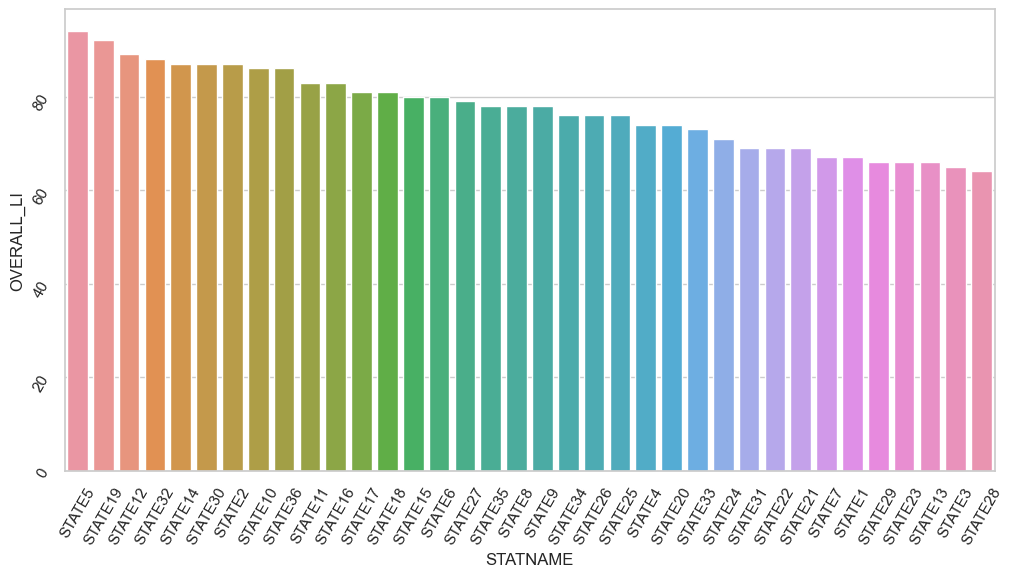

In [2]:
# Visualization

df= data.groupby(["STATNAME"]).agg({"OVERALL_LI" : "mean"}).reset_index().round().sort_values(ascending=False, 
                                                                                              by="OVERALL_LI")

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=df["STATNAME"], y=df["OVERALL_LI"], data=df)
ax.tick_params(rotation=60)

In [3]:
# Explore the data

data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    680 non-null    object 
 1   STATNAME    680 non-null    object 
 2   BLOCKS      680 non-null    int64  
 3   VILLAGES    680 non-null    int64  
 4   CLUSTERS    680 non-null    int64  
 5   TOTPOPULAT  634 non-null    float64
 6   OVERALL_LI  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 37.3+ KB


(680, 7)

In [4]:
# filter dataframe for the district literacy rate data from the states STATE21 and STATE28

STATE_21 = data[data["STATNAME"] == "STATE21"]

STATE_28 = data[data["STATNAME"] == "STATE28"]

In [5]:
# Simulate random sampling


sample_STATE_21 = STATE_21.sample(n=20, replace=True, random_state=13490)

sample_STATE_28 = STATE_28.sample(n=20, replace=True, random_state=13490)

In [6]:
# compute sample means


A= sample_STATE_21["OVERALL_LI"].mean().round(decimals=2)
B = sample_STATE_28["OVERALL_LI"].mean().round(decimals=2)

print(A, B, A-B)

70.85 65.73 5.11999999999999


<img src="creative-writing_10266412.png" width="100" height="100" align=left  >


## Part 3: Modeling and Evaluation

* Here we can see that, based on sample data, the observed difference between the mean district literacy rates of STATE21 and STATE28 is almost 5%. 
<br> But due to sampling variability, this observed difference might simply be due to chance, rather than an actual difference in the corresponding population means. 
<br> At this point, we use a hypothesis test to determine whether or not the results are statistically significant.


### Conduct a hypothesis test
#### The two-sample t-test is the standard approach for comparing the means of two independent samples.
*   $H_0$: There is no difference in the mean district literacy rates between STATE21 and STATE28.
*   $H_A$: There is a difference in the mean district literacy rates between STATE21 and STATE28.




###  <span style='color:darkorchid'> significance level is 5% or 0.05 </span>

In [7]:
# Find the P-value
stats.ttest_ind(a= sample_STATE_21.dropna()["OVERALL_LI"] ,b= sample_STATE_28.dropna()["OVERALL_LI"] ,
                equal_var=False)

Ttest_indResult(statistic=2.5001306292403975, pvalue=0.017019839130377044)

* The p-value is about 0.0170 or 1.7%.
* This means there is only a 1.7% probability that the absolute difference between the two mean district literacy rates would be 5 percentage points or greater if the null hypothesis were true. 
* In other words, it’s highly unlikely that the difference in the two means is due to chance.

<img src="value_10266329.png" width="100" height="100" align=left  >


## Part 4: Conclusion

The p-value of 1.7%, is less than the significance level of 5%. 
 


### <span style='color:darkorchid'> Therefore, we will reject the null hypothesis and conclude that there is a statistically significant difference between the mean district literacy rates of the two states: STATE21 and STATE28. </span>


### <span style='color:navy'> Since there is a statistically significant difference in mean district literacy rates, the state with the lower literacy rate, STATE28, will likely receive more resources to improve literacy.  </span>


